In [1]:
#importing the library
from pyforest import *
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Attribute Information:


 age: age in years
 sex: sex (1 = male; 0 = female)
 
 
    cp: chest pain type
    
         Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
        
        
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)

    chol: serum cholestoral in mg/dl

    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    restecg: resting electrocardiographic results
    
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach: maximum heart rate achieved

    exang: exercise induced angina (1 = yes; 0 = no)

    oldpeak = ST depression induced by exercise relative to rest
    
    
    slope: the slope of the peak exercise ST segment
          Value 1: upsloping    
           Value 2: flat
            Value 3: downsloping

   ca: number of major vessels (0-3) colored by flourosopy
   

   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

   num: diagnosis of heart disease (angiographic disease status)
      Value 0: < 50% diameter narrowing
      Value 1: > 50% diameter narrowing



In [2]:
#loading the dataset
df_heart=pd.read_csv("Heart_1.csv")
#see the dataset
df_heart

<IPython.core.display.Javascript object>

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#check trhe shape of dataset
df_heart.shape

(200, 14)

k o →
 The data set have 200 rows and 14 columns.
    

In [4]:
#check the dtype
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

ko →
    1►dtypes of Age,sex,cp,restecg and num is int.
    
    
    2►dtypes of trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca and thal is Object.


In [5]:
#descibe the dataset
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


ko →
   1►age have highest Standard deviation .
    
    
   
    2►in age columns there is a huge difference between 75% and max value ,maye be some outliers are present inside there.

In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [7]:
df_heart.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

<IPython.core.display.Javascript object>

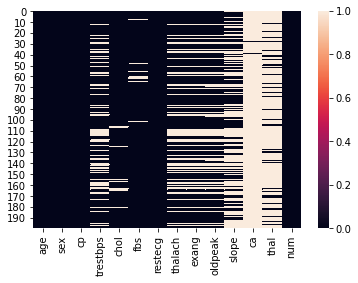

In [8]:
#lets plot the null value with heatmap
sns.heatmap(df_heart.isnull())

ko →
  on ca columns more than 90% data is missing so we can drop that one.

In [9]:
df_heart.drop("ca",axis=1,inplace=True)


In [10]:
#lets fill the null value
s=df_heart.columns
for col in s:
    if df_heart[col].dtype!="object":
        df_heart[col].fillna(df_heart[col].mean(),inplace=True)
    else:
        df_heart[col].fillna(df_heart[col].mode()[0],inplace=True)
        

<IPython.core.display.Javascript object>

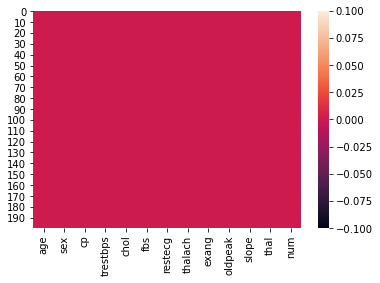

In [11]:
sns.heatmap(df_heart.isnull())

ko → now there is no null value .

In [12]:
#lets make binary classification (0,1,2)=0,(3,4)=1
df_heart['num']=df_heart['num'].replace({0:0,1:0,2:0,3:1,4:1})



In [13]:

df_heart['num'].value_counts()

0    148
1     52
Name: num, dtype: int64

# Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

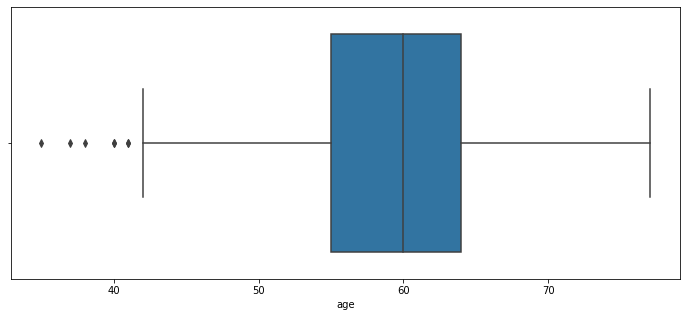

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

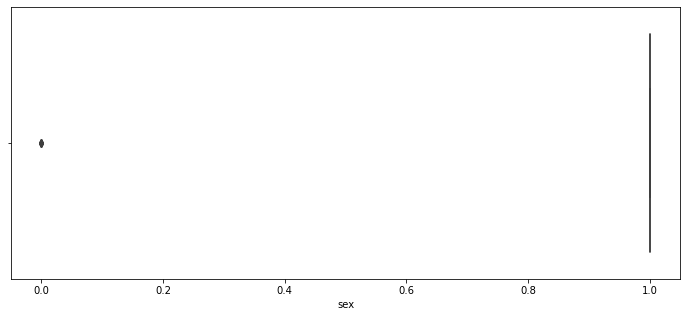

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

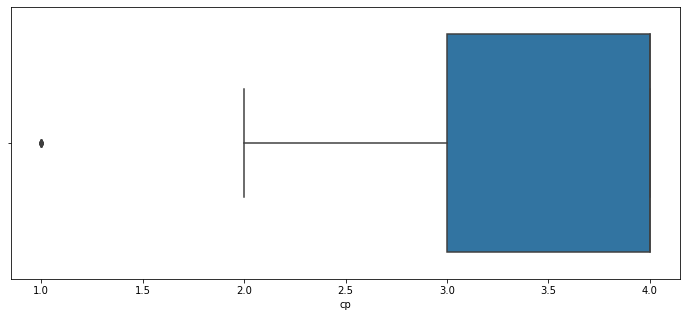

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

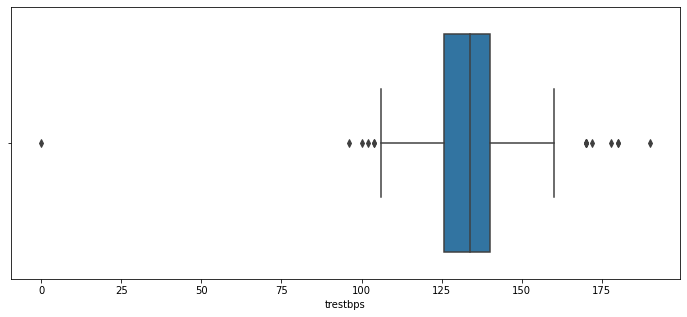

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

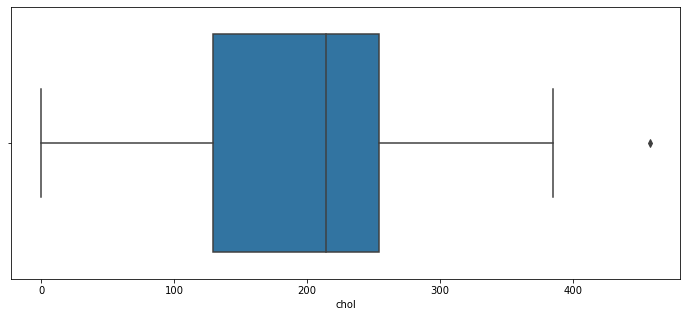

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

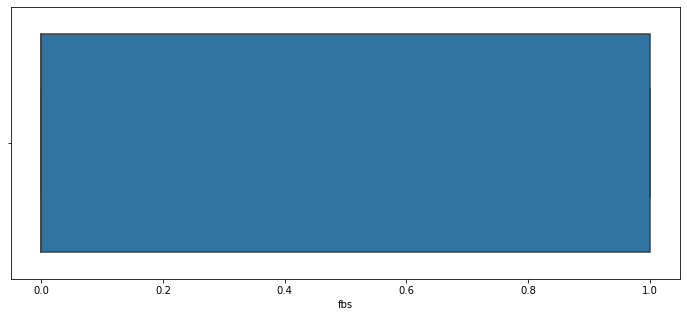

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

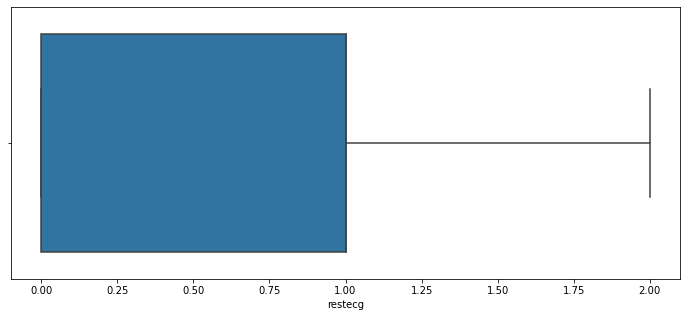

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

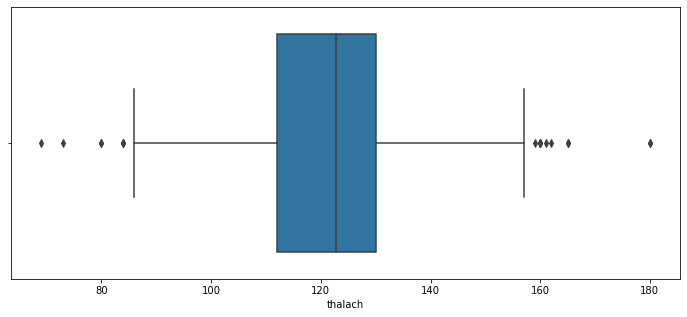

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

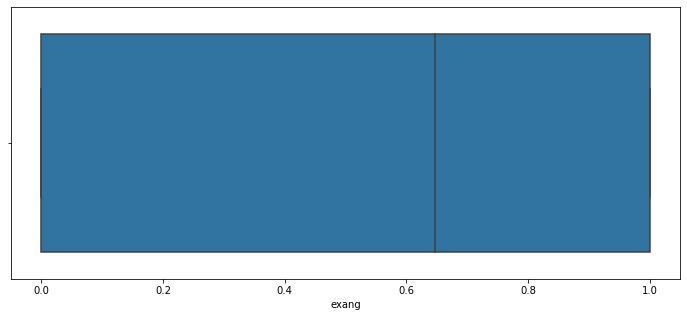

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

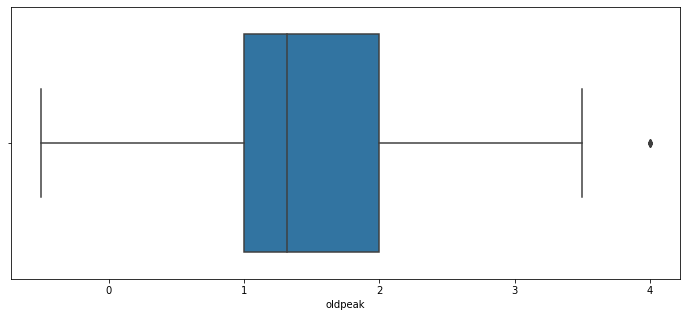

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

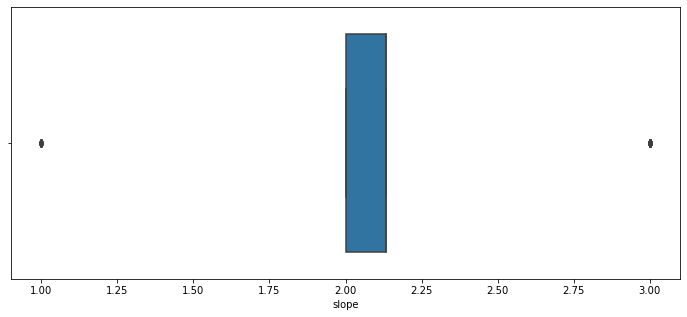

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

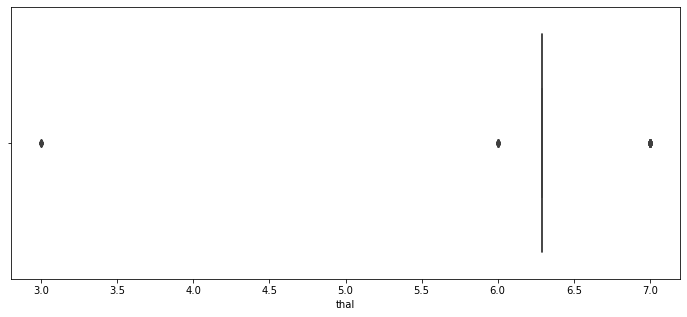

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

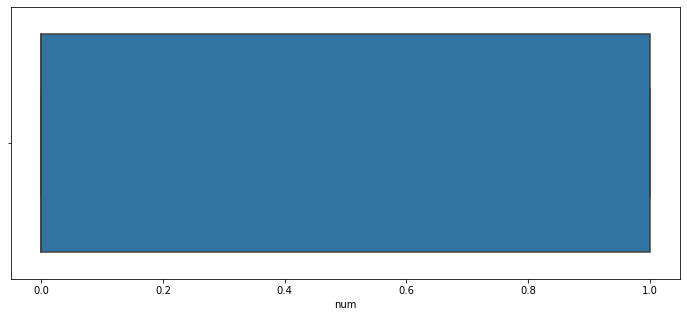

In [14]:
#lets check the outliers
for i in s:#s alredy taken for columns of our data set
    if df_heart[i].dtypes!="object":
        plt.figure(figsize=[12,5])
        sns.boxplot(df_heart[i])
        plt.show()
        

ko →
  in the columns of sope,oldpeak,thalach,age and trestbps may be some outliers are present.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

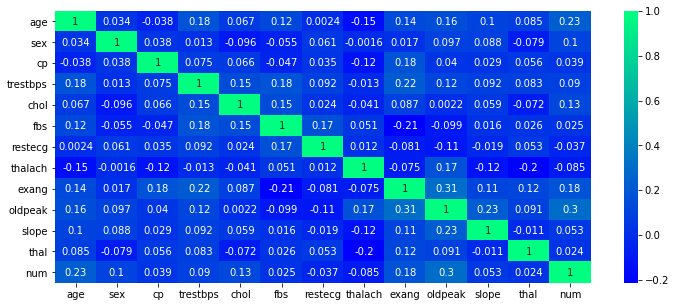

In [15]:
#checking the correlation
plt.figure(figsize=[12,5])
sns.heatmap(df_heart.corr(),annot=True,cmap="winter")

k o → oldpeak is highly correlated with num

<IPython.core.display.Javascript object>

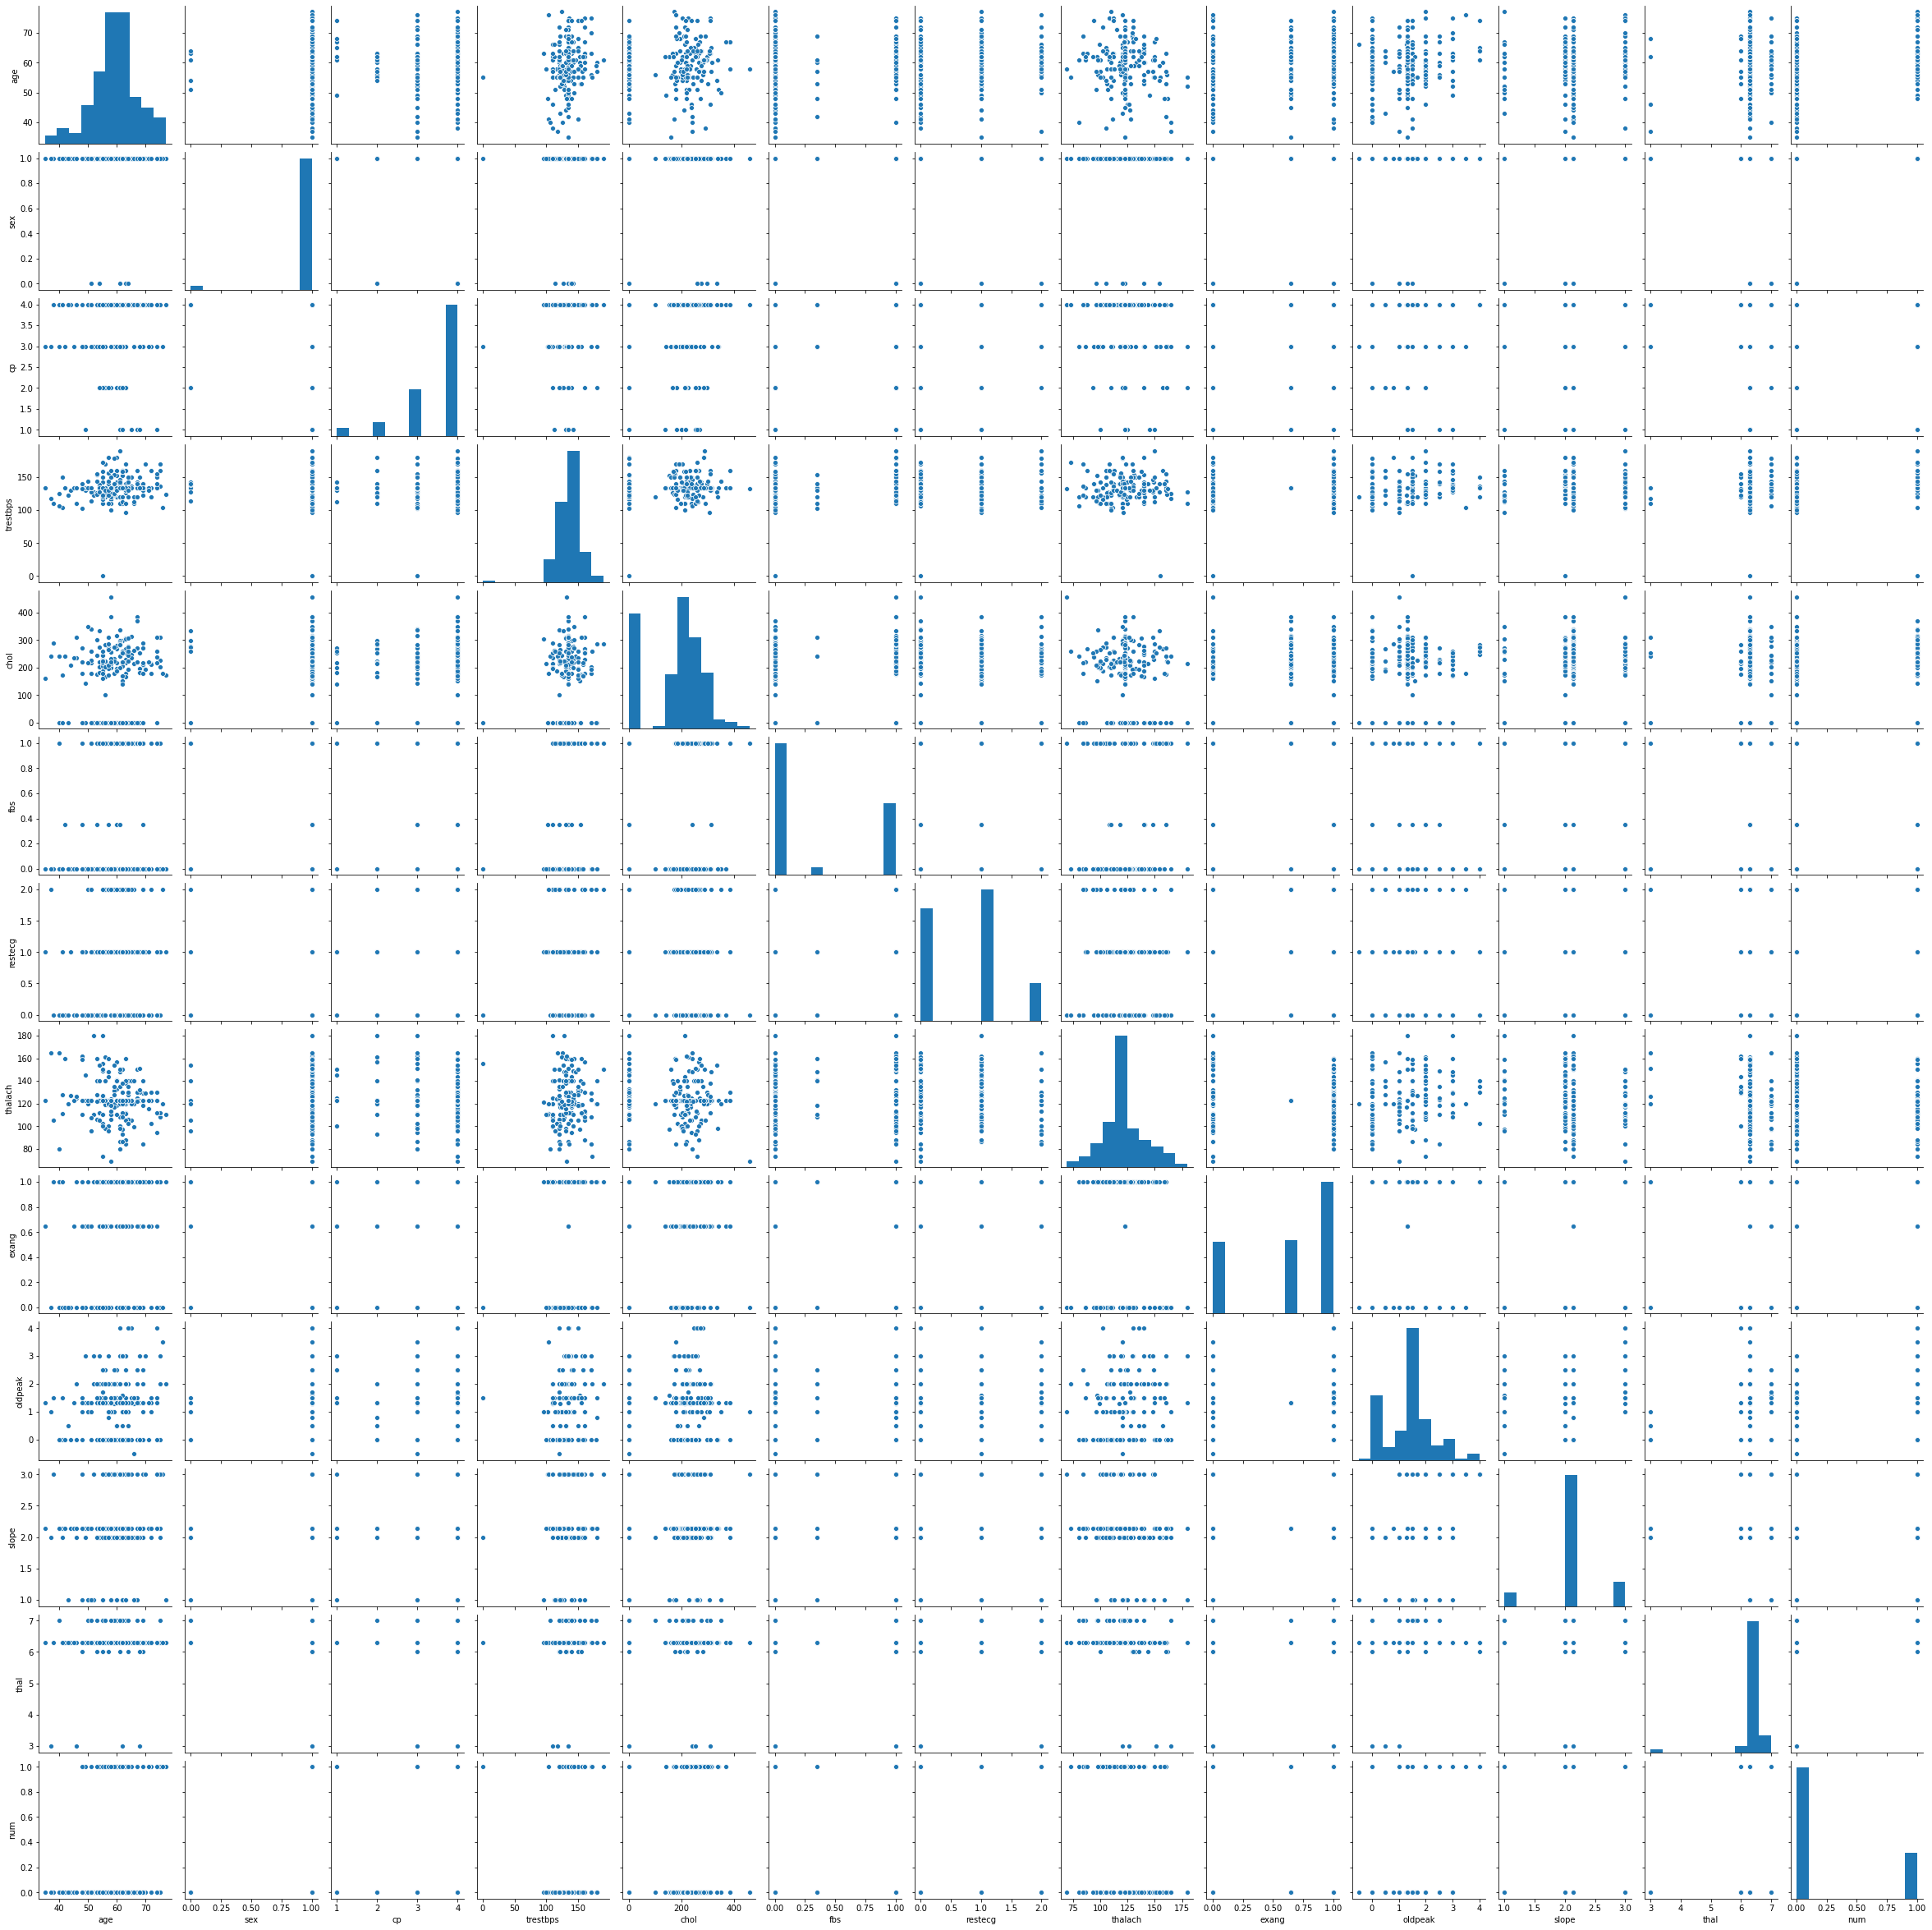

In [16]:
sns.pairplot(df_heart)

# UNIVARIATE ANALYSIS

In [17]:
#lets make a function for countplot
def count(a):
    plt.figure(figsize=[20,5])
    sns.countplot(x=a,data=df_heart)
    plt.show()
    print( "from the above graph→→",
          "\t",df_heart[a].value_counts())
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

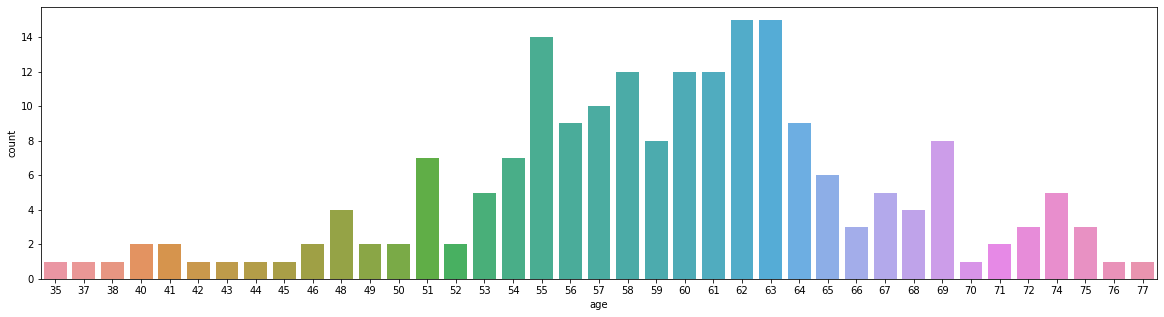

from the above graph→→ 	 63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


In [18]:
count("age")

k o →
  highh number(15) of  patient are belongs to 63 age group 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

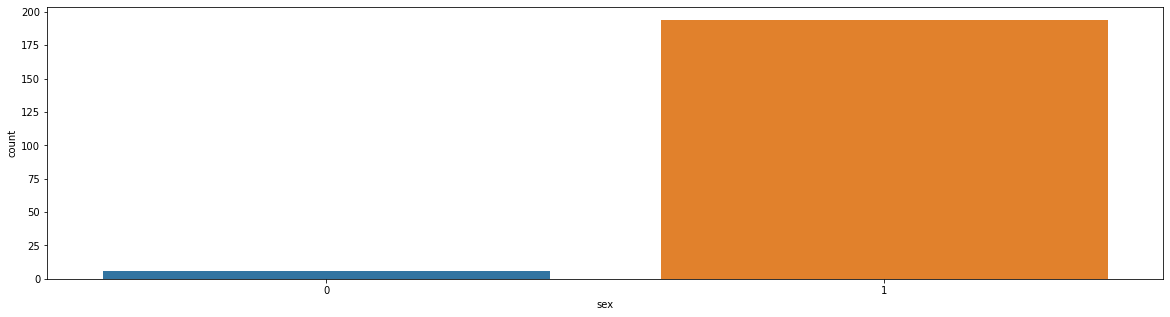

from the above graph→→ 	 1    194
0      6
Name: sex, dtype: int64


In [19]:
count("sex")

ko →
 1► most of the patient are male.with the huge no #194
 2► only 6 Female patient is there

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

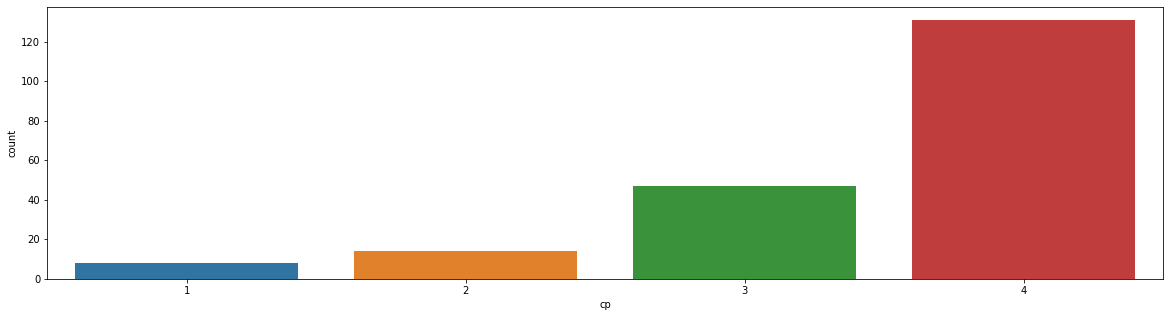

from the above graph→→ 	 4    131
3     47
2     14
1      8
Name: cp, dtype: int64


In [20]:
count("cp")

k o →
      ►131 patient are suffering in asymptomatic chest_pain.
    
      ►47 patient are suffering in non_anginal chest pain.
         
     ►14 patient are suffering in atypical angina chest_pain.
    
     ►8 patient are suffering in typical angina chest_pain.
        
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

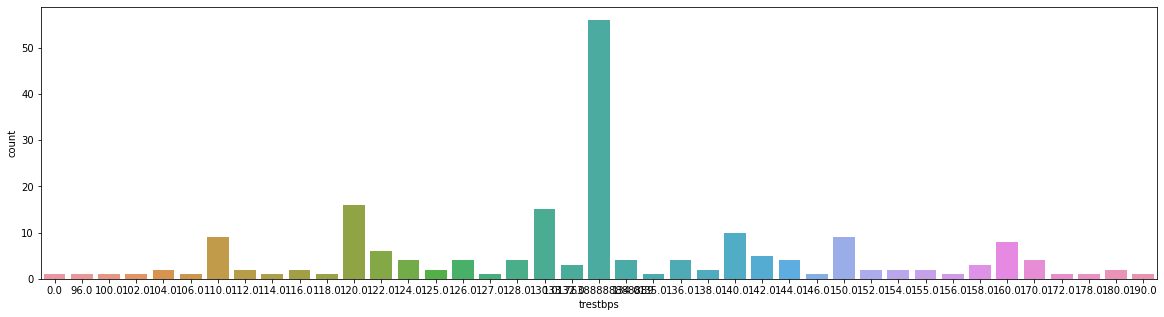

from the above graph→→ 	 133.763889    56
120.000000    16
130.000000    15
140.000000    10
110.000000     9
150.000000     9
160.000000     8
122.000000     6
142.000000     5
134.000000     4
124.000000     4
136.000000     4
126.000000     4
144.000000     4
128.000000     4
170.000000     4
158.000000     3
132.000000     3
116.000000     2
152.000000     2
180.000000     2
154.000000     2
104.000000     2
112.000000     2
138.000000     2
155.000000     2
125.000000     2
102.000000     1
114.000000     1
156.000000     1
172.000000     1
190.000000     1
96.000000      1
118.000000     1
106.000000     1
135.000000     1
146.000000     1
178.000000     1
127.000000     1
0.000000       1
100.000000     1
Name: trestbps, dtype: int64


In [21]:
count("trestbps")

ko →
    56 patients resting blood pressure  is 133.76 when they are taken admission to the hospital.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

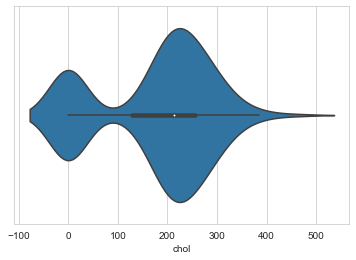

In [22]:
sns.set_style("whitegrid")
sns.violinplot(x="chol",data=df_heart)
plt.show()

 ko → 
     
    ► most of the patients serum cholestoral in mg/dl is between 220 to 260

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

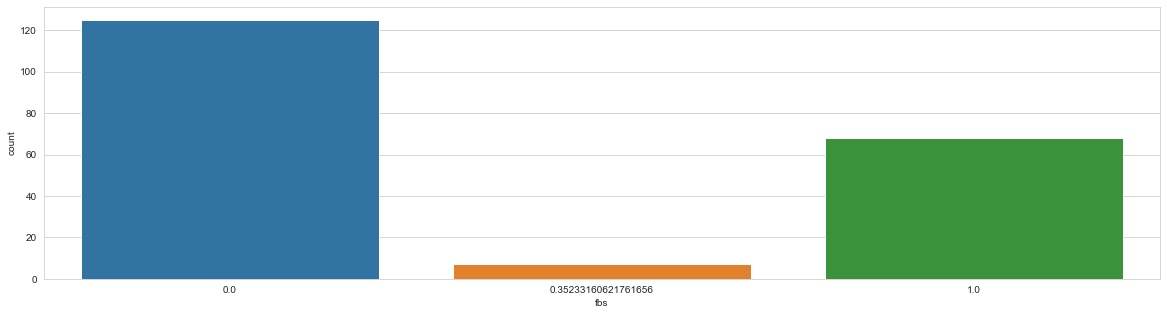

from the above graph→→ 	 0.000000    125
1.000000     68
0.352332      7
Name: fbs, dtype: int64


In [23]:
count("fbs")

ko →
  ► 125 patients's fasting blood sugar > 120 mg/dl.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

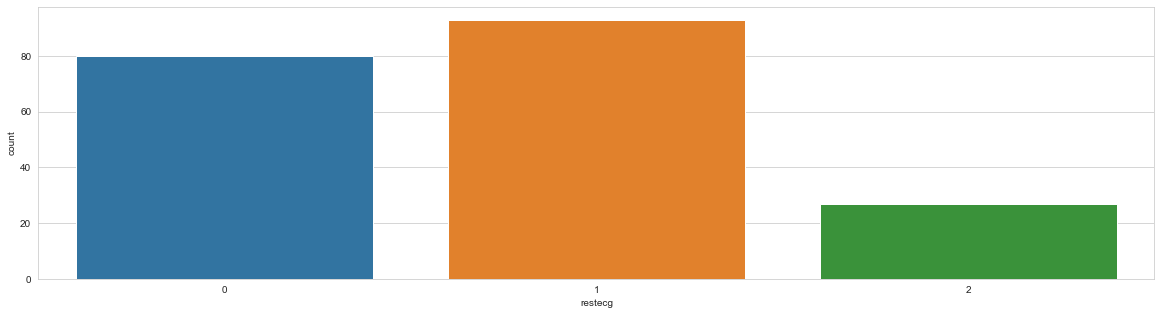

from the above graph→→ 	 1    93
0    80
2    27
Name: restecg, dtype: int64


In [24]:
count("restecg")

 ko →
    ►93 patients's resting electrocardiographic results is normal.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

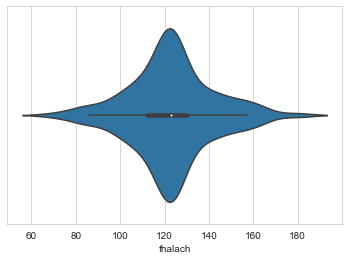

In [25]:
sns.violinplot(x="thalach",data=df_heart)
plt.show()

ko →
   ► most of the patients maximum heart rate is between 120 to 125.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

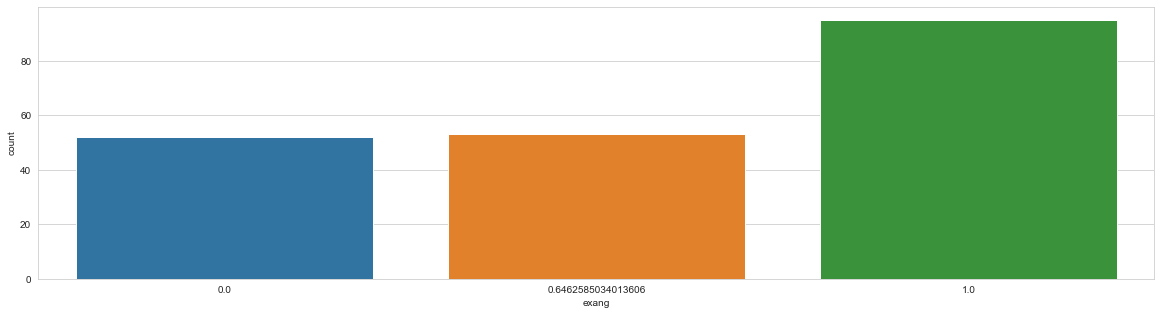

from the above graph→→ 	 1.000000    95
0.646259    53
0.000000    52
Name: exang, dtype: int64


In [26]:
count("exang")

k o →
   ►95 patients doing the exercise induced angina.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

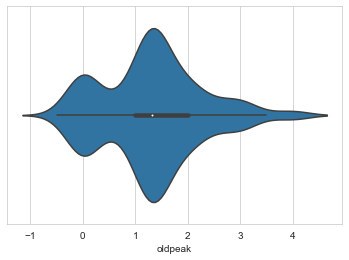

In [27]:
sns.violinplot(x="oldpeak",data=df_heart)
plt.show()

k o →
   ► most of the patients ST depressionos betwwen 1 to 2.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

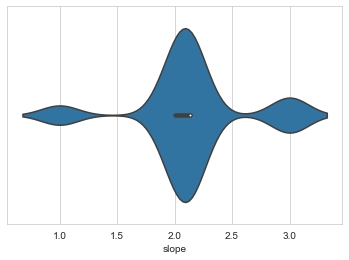

In [28]:
sns.violinplot(x="slope",data=df_heart)
plt.show()

k o →
   ► most of the patients slope of the peak exercise ST segment is between 2.0 to 2.3    .

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

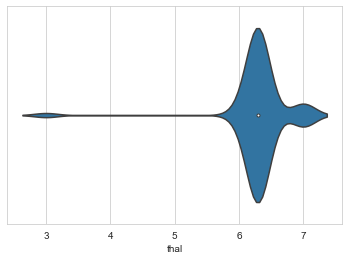

In [29]:
sns.violinplot(x="thal",data=df_heart)
plt.show()

k o → ► most of the patients major vessels  colored by flourosopy is between fixed defect to reversable defect.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

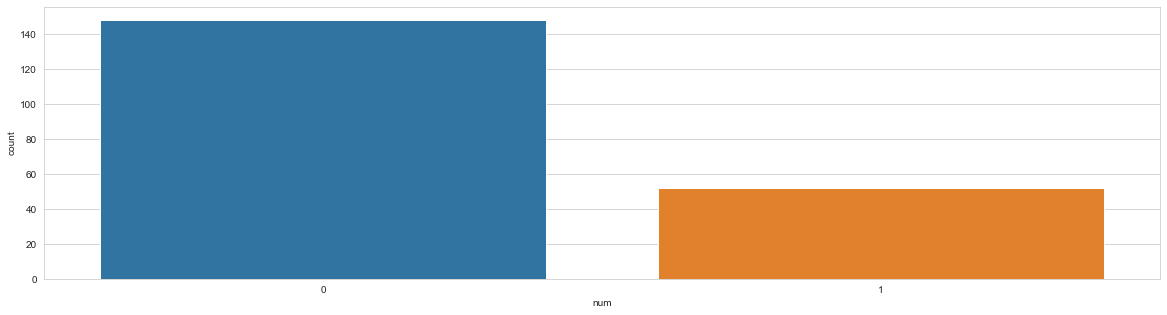

from the above graph→→ 	 0    148
1     52
Name: num, dtype: int64


In [30]:
count("num")

k o → ► most of the patients are below 50% diameter narrowing.

# Bivariate analysis

In [31]:
#lets make a function for point plot
def po(a):
    plt.figure(figsize=[20,6])
    sns.pointplot(x=a,y="age",data=df_heart,hue="num",join=False) 
    plt.xlabel(a)
    plt.ylabel("age")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

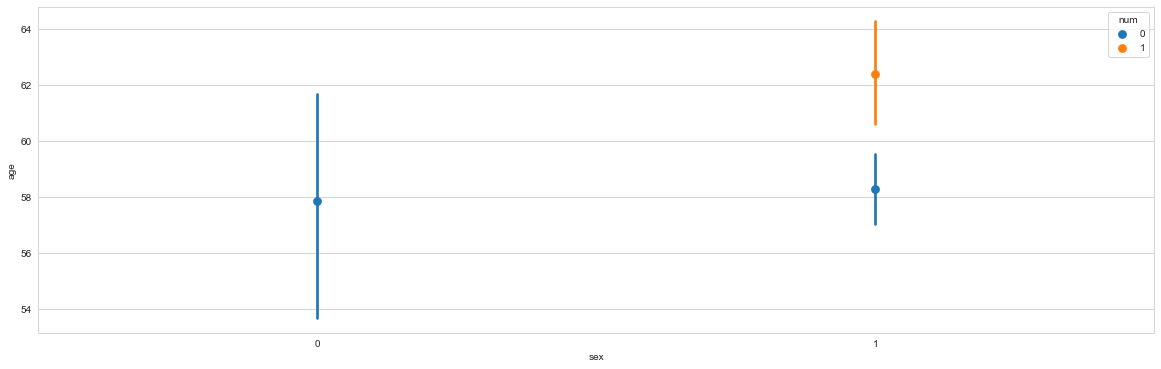

In [32]:
po("sex")

ko →
 ► most of the male patients are above  50% diameter narrowing,when theire age is between 61 years to 64 years.
 
 ► all female patients are below 50% diameter narrowing.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

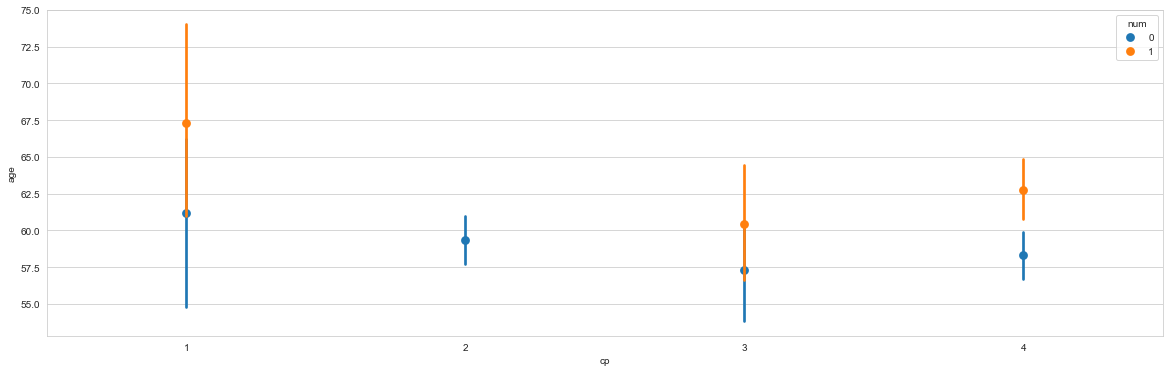

In [33]:
po("cp")

ko → the age group between 61 years to 74 years of patients who;s are having the typical angina theire 
diameter narrowing is above 50%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

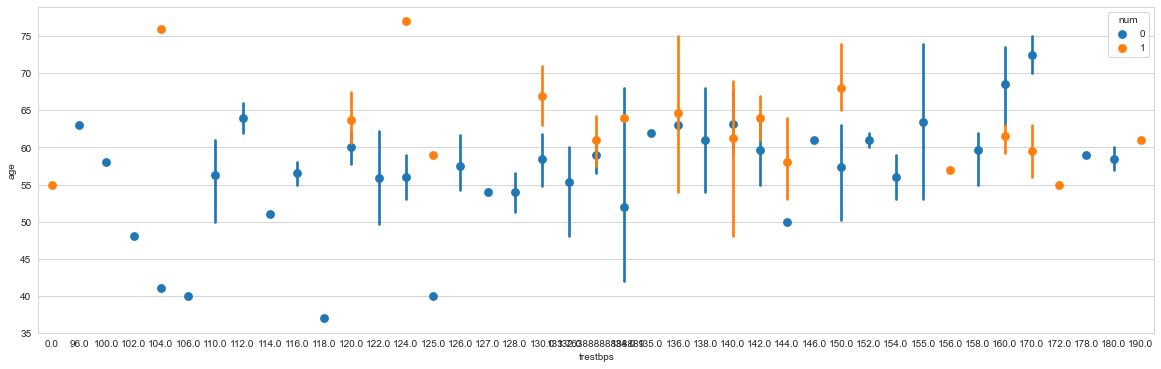

In [34]:
#lets plot trestbps age and num wisCHEST PAIN OFPAI
po("trestbps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

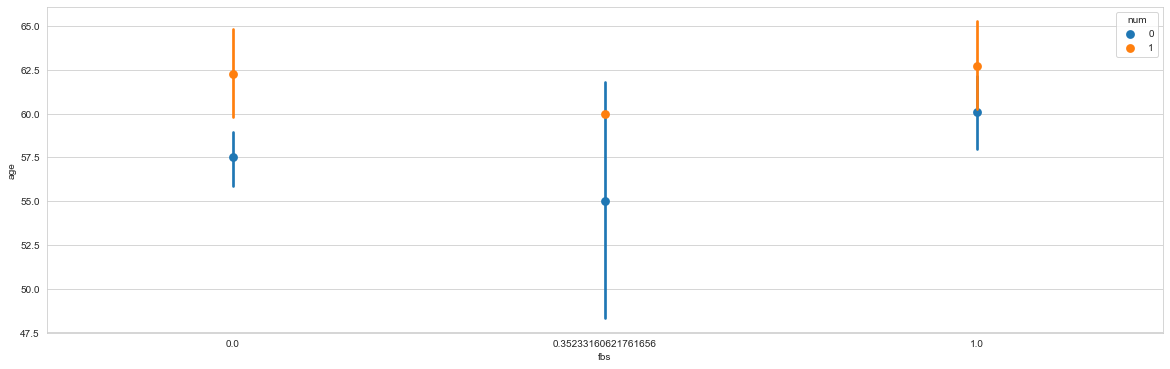

In [35]:
po("fbs")

ko →
   1► when the fasting blood sugar > 120 mg/dl for age group of 60 years to 65 years  the  diameter narrowing is above 50%.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

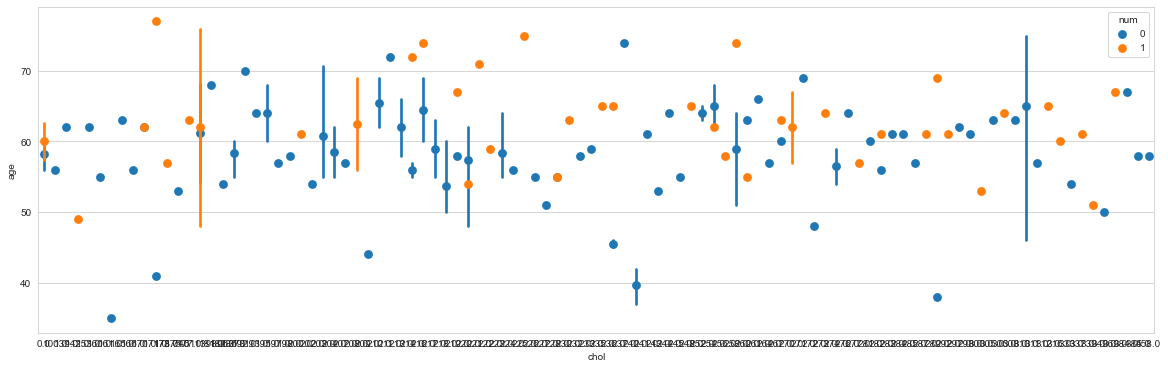

In [36]:
po('chol')

ko →
  ►serum cholestoral wise patients

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

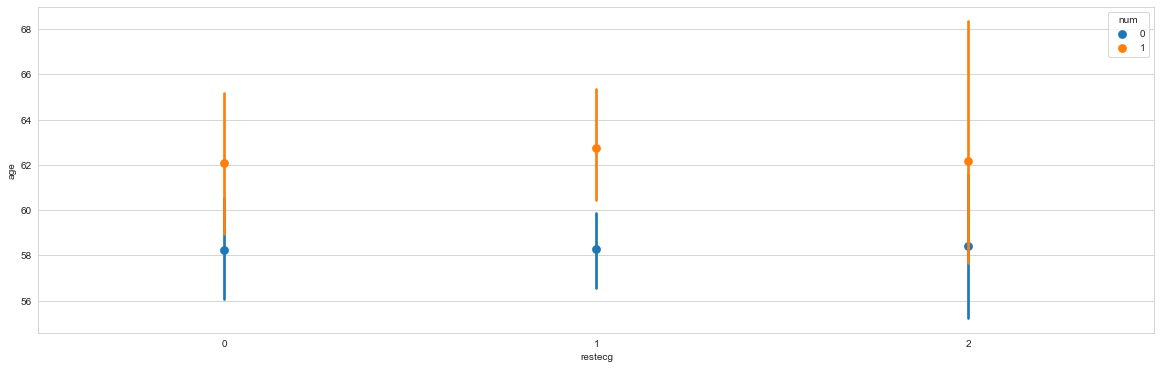

In [37]:
po('restecg')

k o→
  ►Resting electrocardiographic results wise patients.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

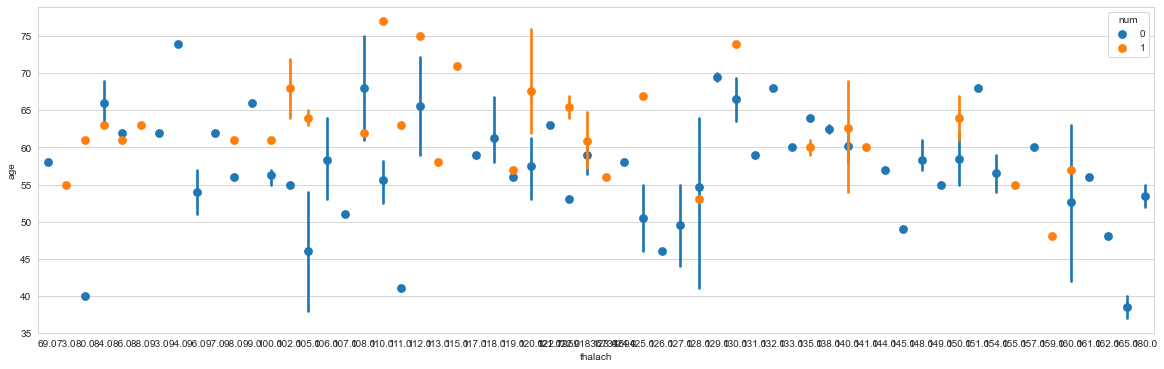

In [38]:
po("thalach")
#Maximum heart rate achieved wise patients num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

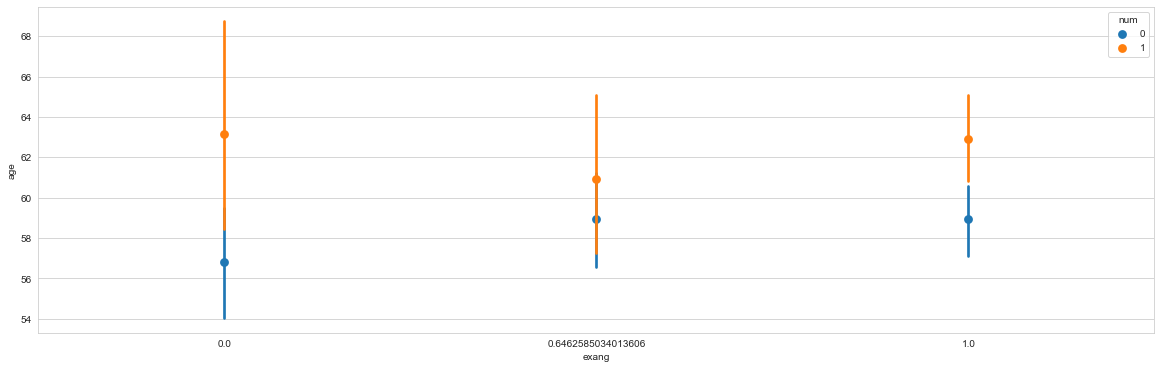

In [39]:
po("exang")
#Exercise induced angina wise patients num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

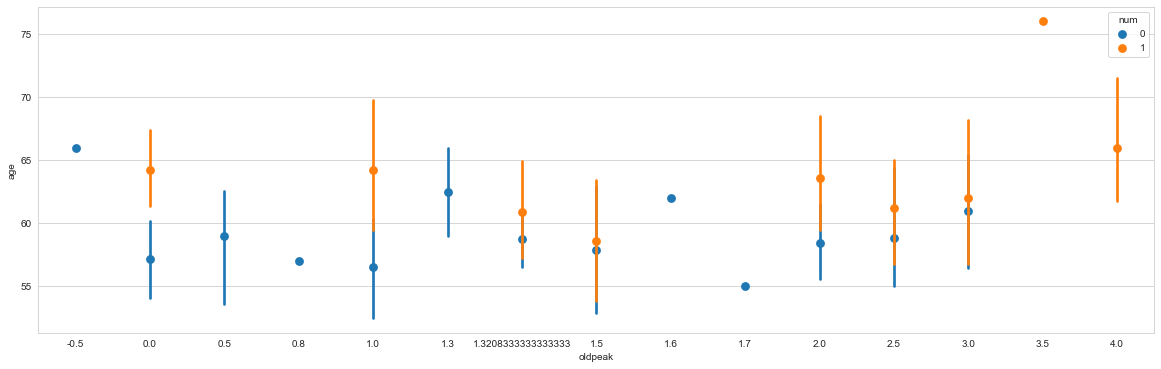

In [40]:
po("oldpeak")
#ST depression induced by exercise relative to rest wise patients num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

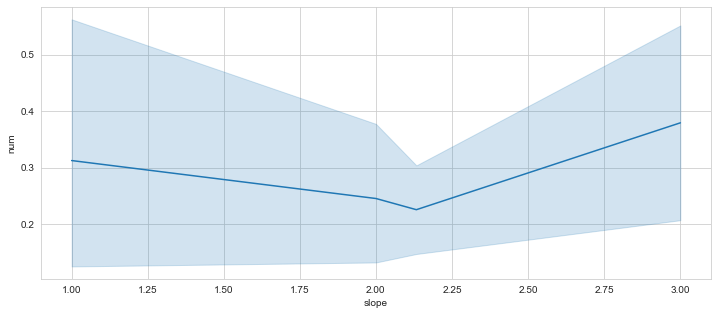

In [41]:
plt.figure(figsize=[12,5])
sns.lineplot(x='slope',y="num",data=df_heart)
plt.show()

ko →
  ► when the slope is crossing 2.00 the num of paitents num also increses.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

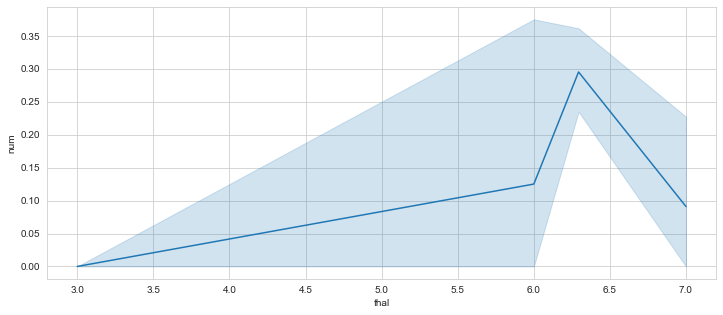

In [42]:
plt.figure(figsize=[12,5])
sns.lineplot(x='thal',y="num",data=df_heart)
plt.show()

In [43]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(df_heart))
print(np.where(z>3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 12,  24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128,
       131, 133, 137, 171, 176, 189, 190, 194, 195, 196], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
        3, 11,  1, 11,  1,  2], dtype=int64))


In [44]:
df_new=df_heart[(z<3).all(axis=1)]

# Data preprocessing

In [45]:
#lets separet the input and output variable
df_x=df_new.drop(columns=["num"])
y=df_new[["num"]]
print(df_x.shape,y.shape)

(177, 12) (177, 1)


In [46]:
#standardize the data
#with MinMax scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


<IPython.core.display.Javascript object>

# Model creation

In [47]:
#Lets create a function fro finding the better random state for each model
#Here we know that our target variable is NUm ,which is catagorical so we are using here the LOGISTIC regression
#We are try to find thr best random satate for getting the better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
def hrt_acc(clf,x,y):
    max_acc=0
    for rd in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
        clf.fit(x_train,y_train)
        y_prd=clf.predict(x_test)
        asc=accuracy_score(y_test,y_prd)
        if asc>max_acc:
            max_acc=asc
            final_rd=rd
    print("max accuracy score coressponding to  Random_state→",final_rd,"is",max_acc*100)
    return final_rd

In [48]:
#lets make a function for confusion matrix and classification report 
def cc_hrt(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    cm=confusion_matrix(y_test,pre)
    print()
    print()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")
    plt.figure(figsize=[20,50],facecolor='green')
    plt.subplot(912)
    plt.title(md,{"fontsize":22})
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [49]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
def cvs_hrt(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy  score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [50]:
#importing the Logistic regression
#cheking the best random score
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
hrt_acc(lg,x,y)

max accuracy score coressponding to  Random_state→ 47 is 88.88888888888889


47

0.8888888888888888
roc_auc_score =  0.6666666666666666





              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.33      0.50         6

    accuracy                           0.89        36
   macro avg       0.94      0.67      0.72        36
weighted avg       0.90      0.89      0.86        36
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

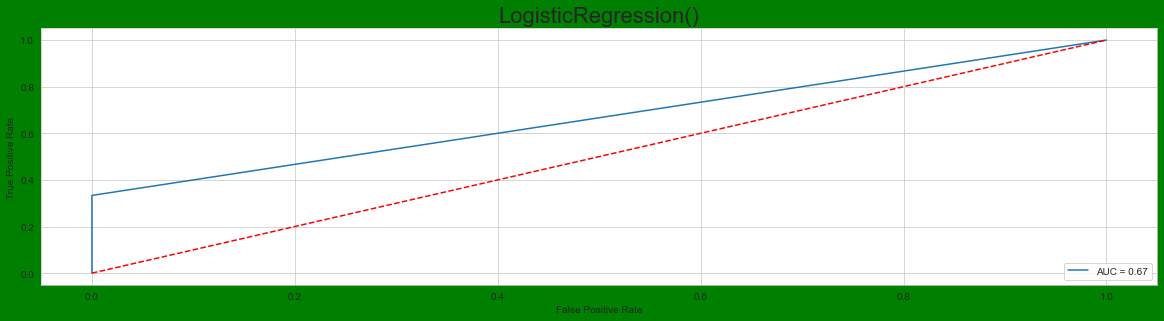

In [51]:
cc_hrt(lg,x,y,47)

In [52]:
cvs_hrt(lg,x,y)

mean accuracy  score for  LogisticRegression() 0.7403174603174604
Standard deviation  in accuracy score for  LogisticRegression() 0.02521462420645037

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.7403174603174604


In [53]:
#lets take an other algorithm 
from sklearn.neighbors import KNeighborsClassifier
#lets import the gridsearchcv for finding the best hyperparameters
from sklearn.model_selection import *
k=KNeighborsClassifier()
parameters={"n_neighbors":range(0,100)}
Gk=GridSearchCV(k,parameters,cv=5,scoring='accuracy')
Gk.fit(x,y)
Gk.best_params_

{'n_neighbors': 7}

In [54]:
knn=KNeighborsClassifier(n_neighbors=7)
hrt_acc(knn,x,y)

max accuracy score coressponding to  Random_state→ 48 is 86.11111111111111


48

0.8611111111111112
roc_auc_score =  0.667741935483871





              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.50      0.40      0.44         5

    accuracy                           0.86        36
   macro avg       0.70      0.67      0.68        36
weighted avg       0.85      0.86      0.85        36
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

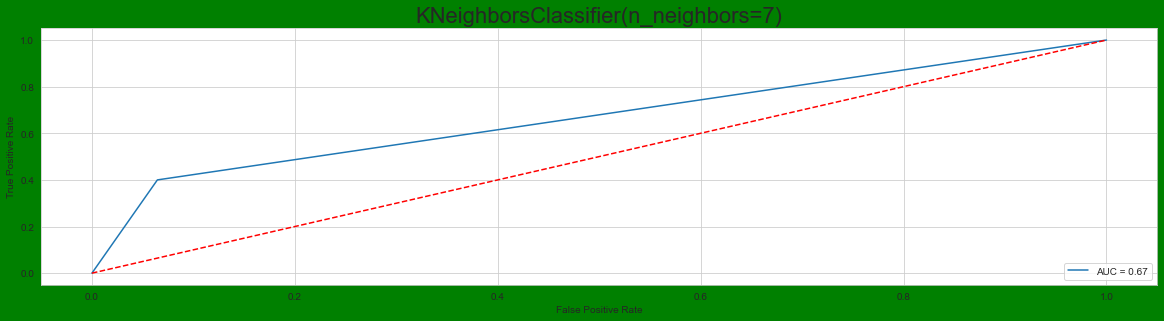

In [55]:
cc_hrt(knn,x,y,48)

In [56]:
cvs_hrt(knn,x,y)

mean accuracy  score for  KNeighborsClassifier(n_neighbors=7) 0.7631746031746032
Standard deviation  in accuracy score for  KNeighborsClassifier(n_neighbors=7) 0.046782600836130256

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_neighbors=7) the accuracy score mean is 0.7631746031746032


In [57]:
#lets go with support vector classifier
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["poly","rbf","linear"],"C":[0.0001,0.001,0.01,0.1,1]}
Gs=GridSearchCV(svc,parameters,cv=5,scoring="accuracy")
Gs.fit(x,y)
Gs.best_params_#finding the best parameters with Gridsearchcv

{'C': 0.1, 'kernel': 'poly'}

In [58]:
svc=SVC(C=0.1,kernel="poly")
hrt_acc(svc,x,y)

max accuracy score coressponding to  Random_state→ 48 is 91.66666666666666


48

0.9166666666666666
roc_auc_score =  0.7





              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.40      0.57         5

    accuracy                           0.92        36
   macro avg       0.96      0.70      0.76        36
weighted avg       0.92      0.92      0.90        36
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

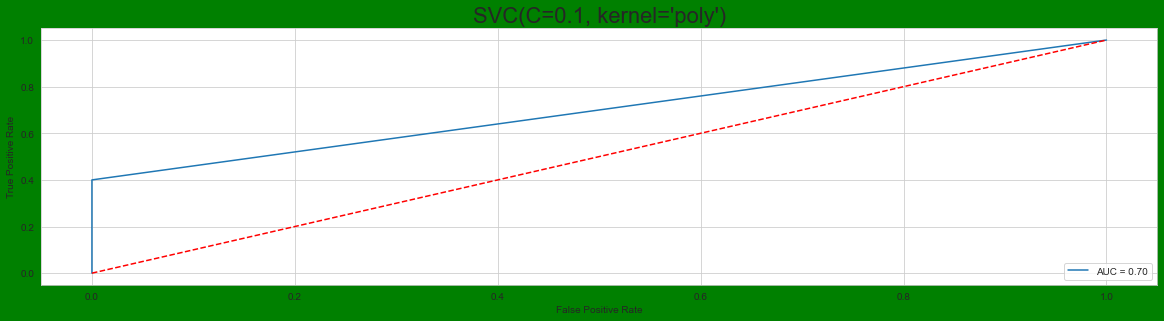

In [59]:
cc_hrt(svc,x,y,48)

In [60]:
cvs_hrt(svc,x,y)

mean accuracy  score for  SVC(C=0.1, kernel='poly') 0.7517460317460317
Standard deviation  in accuracy score for  SVC(C=0.1, kernel='poly') 0.02982860251236667

******************************************************
After seen the cross validation score of SVC(C=0.1, kernel='poly') the accuracy score mean is 0.7517460317460317


In [69]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,50)}
gr=GridSearchCV(rc,parameters,cv=5,scoring="accuracy")
gr.fit(x,y)
gr.best_params_

{'n_estimators': 101}

In [70]:
rnd=RandomForestClassifier(n_estimators=101)
hrt_acc(rnd,x,y)

max accuracy score coressponding to  Random_state→ 48 is 91.66666666666666


48

0.9444444444444444
roc_auc_score =  0.967741935483871





              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.71      1.00      0.83         5

    accuracy                           0.94        36
   macro avg       0.86      0.97      0.90        36
weighted avg       0.96      0.94      0.95        36
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

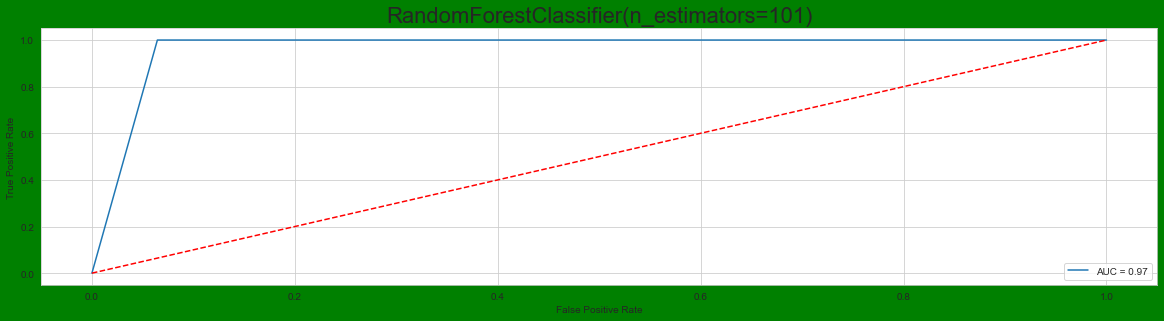

In [71]:
cc_hrt(rnd,x,y,48)

In [72]:
cvs_hrt(rnd,x,y)

mean accuracy  score for  RandomForestClassifier(n_estimators=101) 0.7117460317460317
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=101) 0.04949582033655582

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=101) the accuracy score mean is 0.7117460317460317


In [85]:
#after seen the all aboves result am going to finalise my model with SVC
#with the randomstate=48
svc=SVC(C=0.1,kernel="poly")
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.20)
ranc.fit(x_train,y_train)
pred=ranc.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


91.66666666666666
[[28  3]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.62      1.00      0.77         5

    accuracy                           0.92        36
   macro avg       0.81      0.95      0.86        36
weighted avg       0.95      0.92      0.92        36



In [86]:
#Lets save the above model
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, 'Heart_Disease.pkl')

['Heart_Disease.pkl']

In [87]:
#saving the predictvalue as csv
joblib.dump(svc,'Heart_Disease.csv')

['Heart_Disease.csv']

In [90]:
#lets call the model and predict it
Model=joblib.load('Heart_Disease.csv')
Model.fit(x_train,y_train)
Model.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)